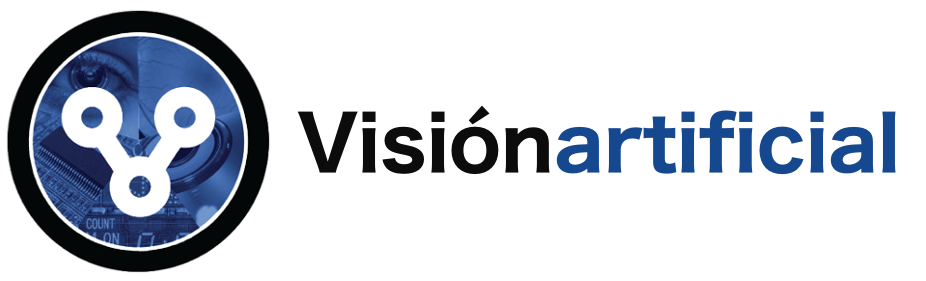

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos STAR</font>

O detector de puntos clave STAR ten as súas raíces no detector de puntos clave CenSurE, introducido por Agrawal et al. no seu artigo ECCV 2008, [CenSurE: Center Surround Extremas for Realtime Feature Detection and Matching](./artigos/agrawal_2008.pdf).

Do mesmo xeito que o detector de puntos Fast Hessian (SURF), o obxectivo de CenSurE e STAR é aproximar a Diferenza de Gaussianas para aumentar a velocidade. Tanto CenSurE como STAR, son exemplos de detectores de puntos clave tipo "blob".

Segundo a miña experiencia, moi poucas veces empregarás o detector STAR, polo que non vou pasar moito tempo cubrindoo, porque é bastante complicado e pesado en matemáticas. Se estás interesado en saber como funciona a baixo nivel,bótalle un ollo ao Agrawal et al. papel vinculado anteriormente.

# <font style="color:rgb(50,120,229)">Obxectivo:</font>
Neste caderno, faremos unha breve revisión do detector de puntos clave CenSurE/STAR.

# <font style="color:rgb(50,120,229)">Como funciona o detector de puntos clave STAR?</font>

Como xa dixemos na introdución deste caderno, o detector de puntos clave STAR pódese considerar unha aproximación á Diferenza de Gaussianas para aumentar a velocidade. Orixinalmente, esta aproximación realízaa o detector de puntos clave CenSurE usando filtros de tipo caixa octogonal e imaxes integrais para aumentar a velocidade, onde tomamos a suma das intensidades de píxeles dentro das seguintes tres rexións dunha área que rodea unha determinada coordenada (x, y):

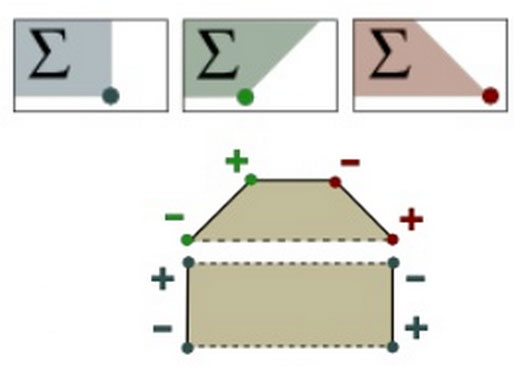


Usando estas rexións, podemos construír rexións "interiores" e "exteriores" que rodean aos puntos clave. A seguinte figura mostra os radios interior e exterior, respectivamente:

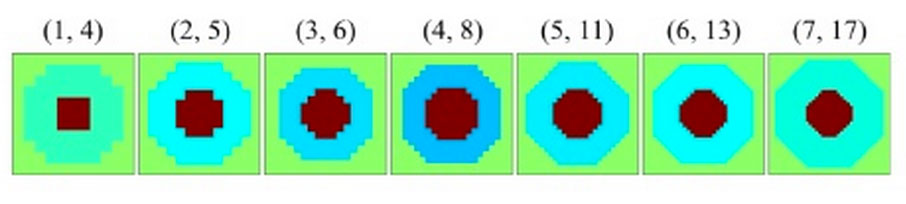

Agora que temos as rexións interna e externa, simplemente calculamos a diferenza entre elas, producindo rexións como esquinas e "blob" dunha imaxe.

En función destas diferenzas entre as rexións internas e externas, buscamos as respostas máximas en todas as escalas da imaxe, o que significa que hai unha diferenza significativa entre os círculos dos radios interior e exterior. E, do mesmo xeito que DoG e Fast Hessian, este proceso realízase en varias escalas da imaxe.

Unha extensión do detector CenSurE é o detector de puntos clave STAR, que se implementa en OpenCV. De novo, o noso obxectivo é aproximar o cálculo da Diferenza de Gaussianas como no detector de puntos clave DoG, pero a diferenza de CenSurE, imos realizar esta aproximación usando dúas imaxes integrais en lugar de tres:

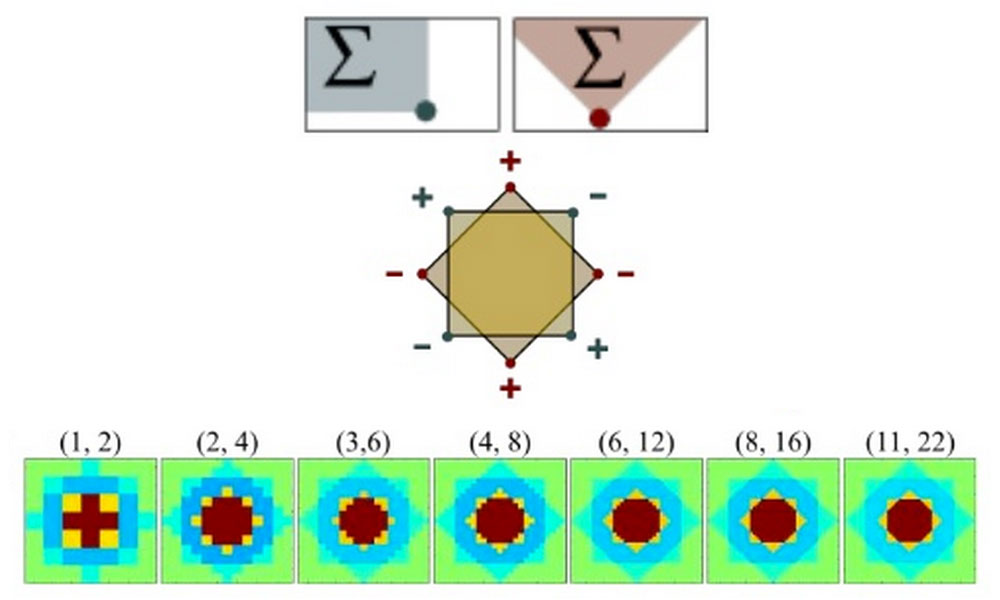

Unha vez máis, repetimos este proceso a través de múltiples escalas, onde restamos a rexión interna da exterior e buscamos grandes diferenzas nos valores.

O detector STAR é moi rápido e é bastante axeitado para a clasificación en tempo real. En moitos casos, segundo a miña experiencia, considero que FAST non só é máis rápido, senón que tamén detecta puntos clave máis fiables.

## Para que se emprega STAR

Do mesmo xeito que DoG e Fast Hessian, o detector de puntos STAR utilízase para localizar rexións repetibles, tipo "blob" nunha imaxe. Estas rexións poden ser bordes, esquinas ou ambos.


Vexamos como se poden obter estes puntos con OpenCV:

In [4]:
# importamos paquetes necesarios
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# de keypoints: 174


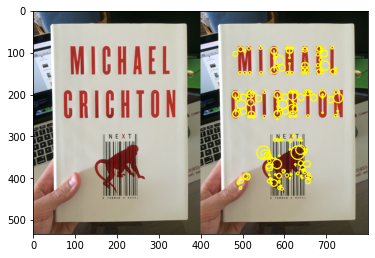

In [6]:
#cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("Imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# detector de puntos clave STAR para OpenCV > 3+
detector = cv2.xfeatures2d.StarDetector_create()
kps = detector.detect(gray)
print("# de keypoints: {}".format(len(kps)))

# Lazo sobre os puntos clave e anotamos un circulo
for kp in kps:
	r = int(0.5 * kp.size)
	(x, y) = np.int0(kp.pt)
	cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));